[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         INFY.NS     INFY.NS     INFY.NS     INFY.NS   INFY.NS
Date                                                                
2020-04-21  568.195923  580.130539  563.350263  563.350263  11660575
2020-04-22  575.957825  578.784468  563.574540  568.195864   8266728
2020-04-23  609.563293  613.466757  572.592860  580.624067  14451289
2020-04-24  590.449951  605.704737  587.578451  599.916881   7319940
2020-04-27  596.372314  611.088717  593.186767  593.186767   7183306
Epoch 1/20



C:\Users\Shriraj\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1732
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010  
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7892e-04
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7298e-04
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8880e-04
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9728e-04
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1606e-04
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1350e-04
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4986e-04
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.1198e-04
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2470e-04
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4491e-04
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - l

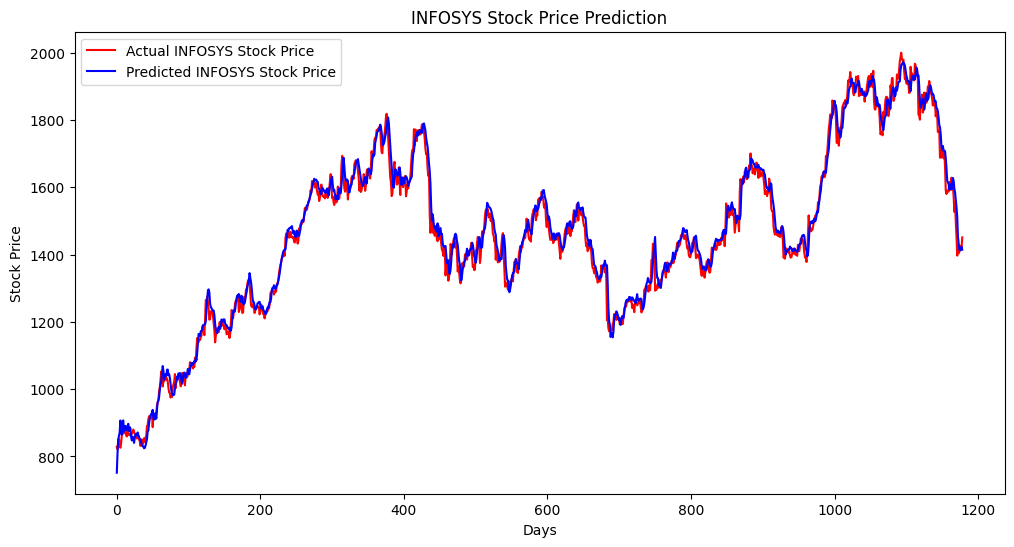

In [3]:
# Install dependencies first!
# pip install yfinance
# pip install numpy pandas matplotlib tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Step 1: Download Escorts Ltd data
data = yf.download('INFY.NS', period='5y', interval='1d')
print(data.head())

# Step 2: Preprocess the data
closing_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Step 3: Prepare training data (60 days lookback)
X = []
y = []

for i in range(60, len(scaled_prices)):
    X.append(scaled_prices[i-60:i, 0])
    y.append(scaled_prices[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for RNN input

# Step 4: Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
history = model.fit(X, y, epochs=20, batch_size=32)

# Step 6: Predict on training data
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Step 7: Plot the results
plt.figure(figsize=(12,6))
plt.plot(real_prices, color='red', label='Actual INFOSYS Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted INFOSYS Stock Price')
plt.title('INFOSYS Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
